In [610]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

# Answers and Explainations
(Expand/modify as needed)

### Results

### Feature Selection Activities

### Hyperparameter Changes

In [611]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [612]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product


In [613]:
#Identify the number of unknown values
missing_values_all_columns = df.isna().sum()
print(missing_values_all_columns)

Timestamp                                                   0
Age                                                        27
Gender                                                     10
City                                                        0
Position                                                    6
Total years of experience                                  16
Years of experience in Germany                             32
Seniority level                                            12
Your main technology / programming language               127
Other technologies/programming languages you use often    157
Yearly brutto salary (without bonus and stocks) in EUR      0
Yearly bonus + stocks in EUR                              424
Number of vacation days                                    68
Employment status                                          17
Сontract duration                                          29
Main language at work                                      16
Company 

In [614]:
most_frequent_gender = df['Gender'].value_counts().idxmax()


In [615]:
pos=df['Position '].value_counts()

In [616]:
#find the rows where position is unknown
mask = df['Position '].isnull()
unknown = df[mask]
unknown

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
131,24/11/2020 12:04:15,34.0,Male,Munich,NaN,17,6,Lead,Java,"Python, Java / Scala, R, SQL, Go, AWS, Google ...",1.200000e+05,20000,32,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency
473,25/11/2020 03:27:34,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,25/11/2020 17:46:23,34.0,Female,Berlin,NaN,13,3,Principal,python,"AWS, Terraform, Scala Spark,",1.080000e+05,NaN,28,Full-time employee,Unlimited contract,English,1000+,Product
1180,20/12/2020 00:30:53,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181,20/12/2020 00:31:23,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,1.111110e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1231,08/01/2021 12:52:08,NaN,NaN,Munich,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [617]:
#Fill the unknown position column based on the salary they make
lower_bound = 95000
upper_bound = 150000
mask = (df['Yearly brutto salary (without bonus and stocks) in EUR'] >= lower_bound) & (df['Yearly brutto salary (without bonus and stocks) in EUR'] <= upper_bound)
df.loc[mask, 'Position '] = df.loc[mask, 'Position '].fillna('Software Engineer')

In [618]:
lower_bound = 30000
upper_bound = 70000
mask1 = (df['Yearly brutto salary (without bonus and stocks) in EUR'] >= lower_bound) & (df['Yearly brutto salary (without bonus and stocks) in EUR'] <= upper_bound)
df.loc[mask1, 'Position '] = df.loc[mask1, 'Position '].fillna('Frontend Developer')

In [619]:
#Find the top 5 salary
top_5_salary = df.nlargest(5, 'Yearly brutto salary (without bonus and stocks) in EUR')
top_5_salary

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
473,25/11/2020 03:27:34,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,27/11/2020 14:55:13,29.0,Female,Cologne,ML Engineer,1,1,Middle,julia,NaN,5.000000e+08,5000000000,99,Full-time employee,Unlimited contract,English,up to 10,Startup
778,26/11/2020 17:08:47,42.0,Male,Berlin,Frontend Developer,18,5,Senior,React JS,Javascript / Typescript,8.500000e+05,95000,35,Full-time employee,Unlimited contract,English,101-1000,Product
576,25/11/2020 13:26:21,24.0,Male,Munich,Data Scientist,1,1,Junior,C++,"Python, C/C++, Swift, Java / Scala, R, SQL, Go...",3.000000e+05,NaN,NaN,Full-time employee,NaN,English,101-1000,Startup
630,25/11/2020 15:53:21,40.0,Male,Cupertino,Software Engineer,20,0,Lead,Swift,NaN,2.500000e+05,450000,45,Full-time employee,Unlimited contract,English,1000+,Product


In [620]:
#Remove the outlier
df = df[df['Yearly brutto salary (without bonus and stocks) in EUR'] <= 100000000]

In [621]:
#Filling the unknown values based on the description table
df['Age'].fillna(32,inplace=True)
df['Gender'].fillna(df['Gender'].value_counts().idxmax(),inplace=True)
df['Total years of experience'].fillna(10,inplace=True)
df['Years of experience in Germany'].fillna(0, inplace=True)
df['Seniority level'].fillna('Senior',inplace=True)
df['Your main technology / programming language'].fillna('Java',inplace=True)
df['Other technologies/programming languages you use often'].fillna('Javascript / Typescript',inplace=True)
df['Yearly bonus + stocks in EUR'].fillna(0,inplace=True)
df['Number of vacation days'].fillna(0, inplace=True)
df['Employment status'].fillna('Full-time employee',inplace=True)
df['Сontract duration'].fillna('Unlimited contract', inplace=True)
df['Main language at work'].fillna('English',inplace=True)
df['Company size'].fillna('1000+',inplace=True)
df['Company type'].fillna('Product',inplace=True)

In [622]:
#Checking for unknown values again
print(df.isna().sum())

Timestamp                                                 0
Age                                                       0
Gender                                                    0
City                                                      0
Position                                                  0
Total years of experience                                 0
Years of experience in Germany                            0
Seniority level                                           0
Your main technology / programming language               0
Other technologies/programming languages you use often    0
Yearly brutto salary (without bonus and stocks) in EUR    0
Yearly bonus + stocks in EUR                              0
Number of vacation days                                   0
Employment status                                         0
Сontract duration                                         0
Main language at work                                     0
Company size                            

In [623]:
value_counts = df['City'].value_counts()
print(value_counts)

City
Berlin         680
Munich         236
Frankfurt       44
Hamburg         40
Stuttgart       26
              ... 
Nuremberg        1
Lübeck           1
Malta            1
Dresden          1
Saarbrücken      1
Name: count, Length: 119, dtype: int64


In [624]:
# Calculate the value counts for the 'city' column
city_value_counts = df['City'].value_counts()

# Get the list of cities with a count of 1
single_count_cities = city_value_counts[city_value_counts == 1].index.tolist()

# Remove rows where the city is in the list of single count cities
df = df[~df['City'].isin(single_count_cities)]

In [625]:
value_counts1= df['City'].value_counts()
print(value_counts1)

City
Berlin              680
Munich              236
Frankfurt            44
Hamburg              40
Stuttgart            26
Cologne              19
Amsterdam             9
Stuttgart             7
Prague                6
Moscow                6
Karlsruhe             6
Düsseldorf            6
Zurich                5
Stockholm             5
London                5
Düsseldorf            4
Nürnberg              4
Heidelberg            4
Helsinki              4
Hannover              3
Rome                  3
Darmstadt             3
Tallinn               3
Dusseldorf            3
Bonn                  3
Mannheim              3
Wolfsburg             3
Boeblingen            3
Aachen                2
Vienna                2
Lisbon                2
Madrid                2
Regensburg            2
Eindhoven             2
Nuremberg             2
Siegen                2
Rosenheim             2
Barcelona             2
Warsaw                2
Paris                 2
Milan                 2
Ingolstadt 

In [626]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
407,24/11/2020 20:02:15,29.0,Male,Berlin,Backend Developer,10,1,Senior,Ruby,Go,80000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product
408,24/11/2020 20:02:34,30.0,Male,Munich,Mobile Developer,8,2,Lead,Swift,Swift,75000.0,86000,24,Full-time employee,Unlimited contract,English,11-50,Startup
409,24/11/2020 20:04:24,24.0,Male,Frankfurt,Frontend Developer,3,0,Middle,JavaScript,"Javascript / Typescript, Docker",44000.0,3000,26,Full-time employee,Unlimited contract,English,51-100,Product


In [627]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Other technologies/programming languages you use often
Javascript / Typescript                                                     191
Python                                                                       33
SQL                                                                          31
AWS, Docker                                                                  16
Swift                                                                        13
                                                                           ... 
Python, Javascript / Typescript, .NET, Java / Scala, Kubernetes, Docker       1
Python, Kotlin, Java / Scala, SQL, AWS, Google Cloud, Kubernetes, Docker      1
Python, C/C++, Javascript / Typescript, SQL                                   1
Python, Ruby, Java / Scala, Google Cloud, Kubernetes, Docker                  1
Python, AWS, Kubernetes, Docker, terraform, ansible                           1
Name: count, Length: 536, dtype: int64

In [628]:
df.sample(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
467,25/11/2020 00:01:55,36.0,Male,Munich,IT Spezialist,15,6,Senior,AWS,"Javascript / Typescript, Java / Scala, AWS, Do...",79300.0,11900,30,Full-time employee,Unlimited contract,German,1000+,Product
316,24/11/2020 16:56:17,30.0,Male,Munich,Frontend Developer,9,3,Middle,TypeScript,"Javascript / Typescript, Kubernetes",66000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product
328,24/11/2020 17:29:12,29.0,Male,Bonn,Mobile Developer,5,2,Middle,Objective-C,Swift,55000.0,4000,24,Full-time employee,Unlimited contract,English,11-50,Product
738,26/11/2020 08:42:09,30.0,Male,Berlin,Frontend Developer,6,1,Senior,Javascript,"Python, Javascript / Typescript, SQL, SAP / ABAP",79000.0,10000,27,Full-time employee,Unlimited contract,English,1000+,Product
1198,24/12/2020 15:12:35,36.0,Male,Regensburg,Software Engineer,10,10,Middle,C#,"Javascript / Typescript, .NET, SQL",66000.0,6000,30,Full-time employee,Unlimited contract,German,51-100,Consulting / Agency
884,28/11/2020 07:10:16,33.0,Male,Berlin,Product Manager,5,5,Middle,PM tools,Javascript / Typescript,70000.0,0,26,Full-time employee,Temporary contract,English,1000+,Product
1147,11/12/2020 22:00:36,34.0,Female,Berlin,Designer (UI/UX),10,6,Senior,"PS, Sketch, React, CSS3",Javascript / Typescript,45000.0,0,30,Full-time employee,Unlimited contract,German,up to 10,Product
1027,01/12/2020 12:29:04,28.0,Male,Berlin,Data Scientist,6,6,Lead,"Python, SQL","Python, Javascript / Typescript, SQL, AWS, Goo...",78000.0,0,26,Full-time employee,Unlimited contract,English,51-100,Consulting / Agency
1031,01/12/2020 14:21:01,23.0,Female,Berlin,Data analyst,1,1,Junior,Sql,"Python, R, SQL, Google Cloud",36000.0,36000,28,Full-time employee,Unlimited contract,English,1000+,Startup
710,25/11/2020 23:01:28,35.0,Male,Berlin,QA Engineer,12,3,Senior,JS,"Javascript / Typescript, SQL",63000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [629]:
#find the data type
column_dtype = df['Yearly brutto salary (without bonus and stocks) in EUR'].dtype
column_dtype1 = df['Yearly bonus + stocks in EUR'].dtype
print("Data type of the column:", column_dtype)
print(column_dtype1)

Data type of the column: float64
object


In [630]:

# Convert the column to numeric, coercing errors to NaN
numeric_column = pd.to_numeric(df['Yearly bonus + stocks in EUR'], errors='coerce')

# Find non-numeric values (NaNs) in the column
non_numeric_values = df['Yearly bonus + stocks in EUR'][numeric_column.isna()]


# Print non-numeric values
print(non_numeric_values)

472     bvg only
804      15000+-
959           Na
1052           -
1157    Not sure
Name: Yearly bonus + stocks in EUR, dtype: object


In [631]:

# Replace specific values with 0
specific_values_to_replace = ['bvg only', '15000+-', 'Na', '-', 'Not sure']
df['Yearly bonus + stocks in EUR'] = df['Yearly bonus + stocks in EUR'].replace(specific_values_to_replace, '0')

# Convert the column to numeric type
df['Yearly bonus + stocks in EUR'] = pd.to_numeric(df['Yearly bonus + stocks in EUR'])

In [632]:
df['Compensation']=df['Yearly brutto salary (without bonus and stocks) in EUR']+df['Yearly bonus + stocks in EUR']

In [633]:
df.rename(columns={'Compensation': 'target'}, inplace=True)

df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,Javascript / Typescript,80000.0,0.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,Javascript / Typescript,54000.0,0.0,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0


In [634]:
#Checking the unknown values again
df.isna().sum()

Timestamp                                                 0
Age                                                       0
Gender                                                    0
City                                                      0
Position                                                  0
Total years of experience                                 0
Years of experience in Germany                            0
Seniority level                                           0
Your main technology / programming language               0
Other technologies/programming languages you use often    0
Yearly brutto salary (without bonus and stocks) in EUR    0
Yearly bonus + stocks in EUR                              0
Number of vacation days                                   0
Employment status                                         0
Сontract duration                                         0
Main language at work                                     0
Company size                            

In [635]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [636]:
df.dtypes


Timestamp                                                  object
Age                                                       float64
Gender                                                     object
City                                                       object
Position                                                   object
Total years of experience                                  object
Years of experience in Germany                             object
Seniority level                                            object
Your main technology / programming language                object
Other technologies/programming languages you use often     object
Yearly brutto salary (without bonus and stocks) in EUR    float64
Yearly bonus + stocks in EUR                              float64
Number of vacation days                                    object
Employment status                                          object
Сontract duration                                          object
Main langu

In [637]:
# Replace commas with dots in the column
df['Total years of experience'] = df['Total years of experience'].str.replace(',', '.')

# Convert the column to a numeric data type
df['Total years of experience'] = pd.to_numeric(df['Total years of experience'], errors='coerce')


In [638]:
df.dtypes

Timestamp                                                  object
Age                                                       float64
Gender                                                     object
City                                                       object
Position                                                   object
Total years of experience                                 float64
Years of experience in Germany                             object
Seniority level                                            object
Your main technology / programming language                object
Other technologies/programming languages you use often     object
Yearly brutto salary (without bonus and stocks) in EUR    float64
Yearly bonus + stocks in EUR                              float64
Number of vacation days                                    object
Employment status                                          object
Сontract duration                                          object
Main langu

Pipeline

In [639]:
numeric_features = ['Age', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Yearly bonus + stocks in EUR']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'City', 'Position ', 'Seniority level', 'Employment status', 'Main language at work', 'Company size', 'Company type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Predictions

In [640]:
from sklearn.ensemble import ExtraTreesRegressor

# Define the pipeline with ExtraTreesRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', ExtraTreesRegressor())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = pipeline.predict(X_test)
print(predictions)

[ 71818.      91057.      97104.      52920.      70000.      85303.5
  89222.      60000.      86995.      88110.5     45735.8     86910.
  75000.     149775.      70010.      85261.25    69023.      59080.
 147562.31    60000.      68042.      59964.      53070.      71975.
  69013.      80960.     178140.      50000.      90100.      99503.1
  55000.      57287.     196136.      75000.      60729.     218070.
  70060.      71768.      70045.5     82783.5     53962.      45060.
 133855.22    67916.2    127836.08    65372.     100851.1     65510.
 184180.      93568.5    122188.      64990.      92248.      75000.
  73942.      60485.4     57287.      66098.0899  52038.      75050.
  69979.5    100000.      75878.5     47808.      47983.85    63930.
  70070.      76562.02    30155.4     72014.      72076.      77661.61
  63904.     146510.     103985.15    65000.      66024.1065 338120.
  52106.      82884.      74060.      74280.      75000.      60000.
  78640.     126329.53   13983

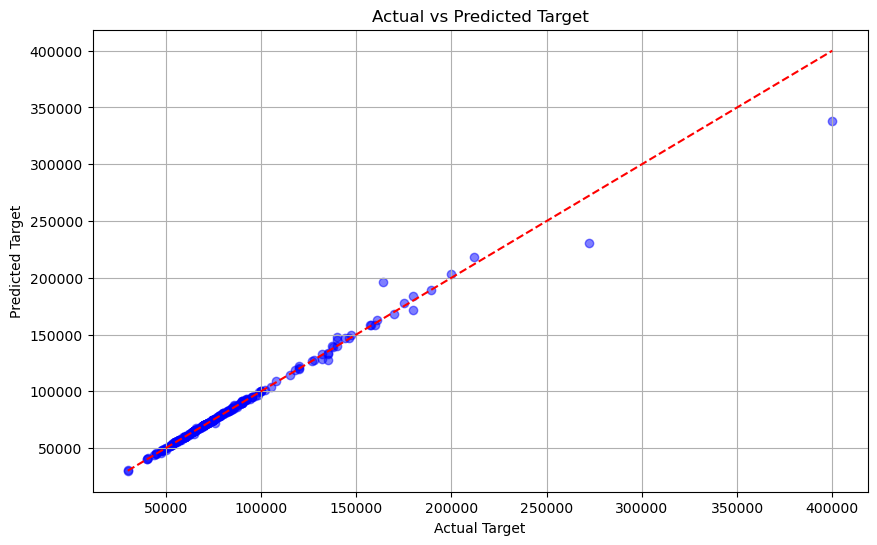

In [641]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Target')
plt.grid(True)
plt.show()

In [642]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) score:", r2)

Mean Absolute Error (MAE): 1123.09787118644
Mean Squared Error (MSE): 29711310.1881128
R-squared (R^2) score: 0.98095514896367
